In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
market_df=pd.read_csv(r"C:\Users\admin\Downloads\drive-download-20240312T173024Z-001\market_fact.csv")
customer_df=pd.read_csv(r"C:\Users\admin\Downloads\drive-download-20240312T173024Z-001\cust_dimen.csv")
product_df=pd.read_csv(r"C:\Users\admin\Downloads\drive-download-20240312T173024Z-001\prod_dimen.csv")
shipping_df=pd.read_csv(r"C:\Users\admin\Downloads\drive-download-20240312T173024Z-001\shipping_dimen.csv")
orders_df=pd.read_csv(r"C:\Users\admin\Downloads\drive-download-20240312T173024Z-001\orders_dimen.csv")

In [4]:
market_df.head(2)

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54


In [5]:
customer_df.head(2)

,Customer_Name,Province,Region,Customer_Segment,Cust_id
0,MUHAMMED MACINTYRE,NUNAVUT,NUNAVUT,SMALL BUSINESS,Cust_1
1,BARRY FRENCH,NUNAVUT,NUNAVUT,CONSUMER,Cust_2


In [6]:
product_df.head(2)

,Product_Category,Product_Sub_Category,Prod_id
0,OFFICE SUPPLIES,STORAGE & ORGANIZATION,Prod_1
1,OFFICE SUPPLIES,APPLIANCES,Prod_2


In [7]:
shipping_df.head(2)

,Order_ID,Ship_Mode,Ship_Date,Ship_id
0,3,REGULAR AIR,20-10-2010,SHP_1
1,293,DELIVERY TRUCK,02-10-2012,SHP_2


In [8]:
orders_df.head(2)

,Order_ID,Order_Date,Order_Priority,Ord_id
0,3,13-10-2010,LOW,Ord_1
1,293,01-10-2012,HIGH,Ord_2


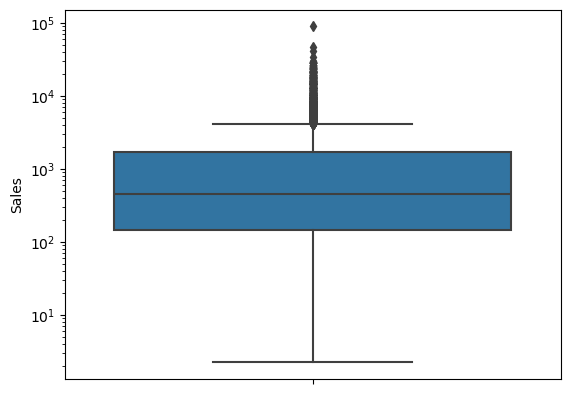

In [3]:
sns.boxplot(y=market_df['Sales'])
plt.yscale('log')
plt.show()

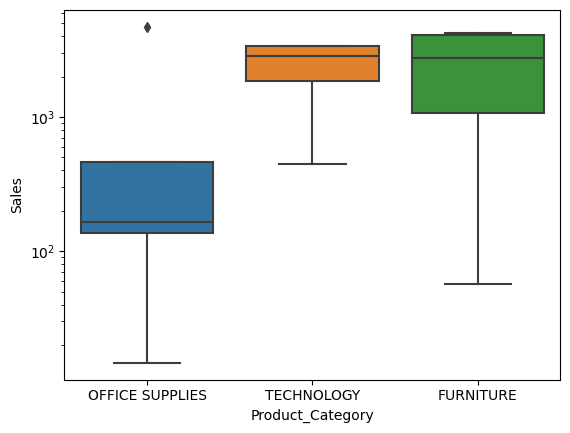

In [20]:
#boxplot of sales for each product category.
sns.boxplot(x=product_df['Product_Category'],y=market_df['Sales'])
plt.yscale('log')
plt.show()

In [19]:
#merge market and product dataset by prod_id
df=pd.merge(market_df,product_df,how='inner',on='Prod_id')
df.head(3)

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
1,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
2,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"


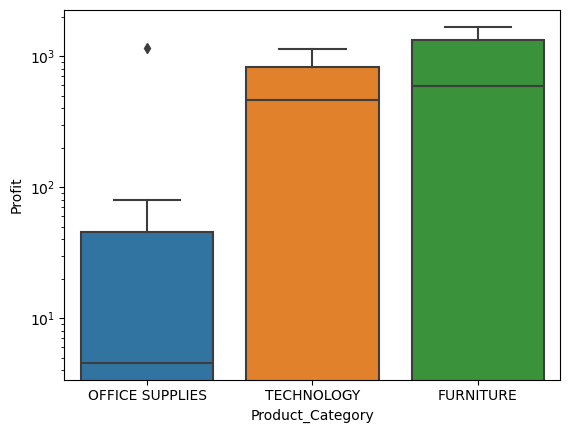

In [18]:
#boxplot of profit for each product category
sns.boxplot(x=product_df['Product_Category'],y=market_df['Profit'])
plt.yscale('log')
plt.show()

In [17]:
# subsetting
df1=df[(df.Profit>-14140)&(df.Profit<1000)]
df1.head(3)

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
1,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
2,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"


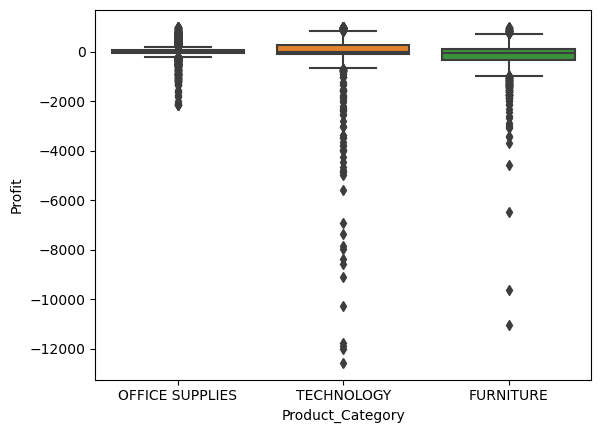

In [16]:
#boxplot of profit for created subset
sns.boxplot(x=df1['Product_Category'],y=df1['Profit'])
plt.show()

Text(0.5, 1.0, 'Profit')

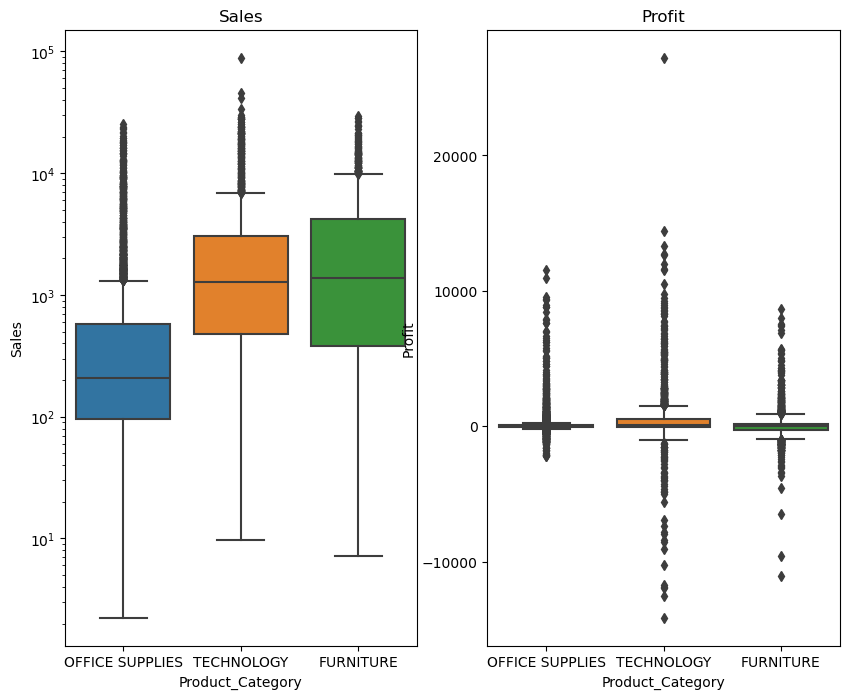

In [21]:
#to adjust figsize
plt.figure(figsize=(10,8))
#subplot1:sales
plt.subplot(1,2,1)
sns.boxplot(x='Product_Category',y='Sales',data=df)
plt.title('Sales')
plt.yscale('log')
#subplot1:Profit
plt.subplot(1,2,2)
sns.boxplot(x='Product_Category',y='Profit',data=df)
plt.title('Profit')


In [22]:
#merge customer_df by cust_id
df3=pd.merge(df,customer_df,how='inner',on='Cust_id')
df3.head(3)

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category,Customer_Name,Province,Region,Customer_Segment
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",AARON BERGMAN,ALBERTA,WEST,CORPORATE
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,OFFICE SUPPLIES,PENS & ART SUPPLIES,AARON BERGMAN,ALBERTA,WEST,CORPORATE
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,TECHNOLOGY,TELEPHONES AND COMMUNICATION,AARON BERGMAN,ALBERTA,WEST,CORPORATE


<Axes: xlabel='Customer_Segment', ylabel='Profit'>

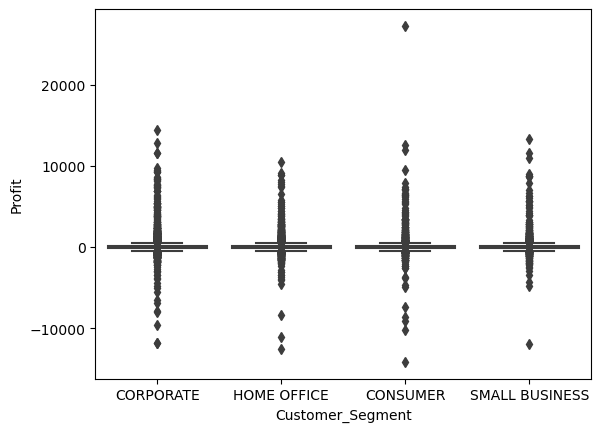

In [23]:
#boxplot of a variable across various product categories
sns.boxplot(x='Customer_Segment',y='Profit',data=df3)

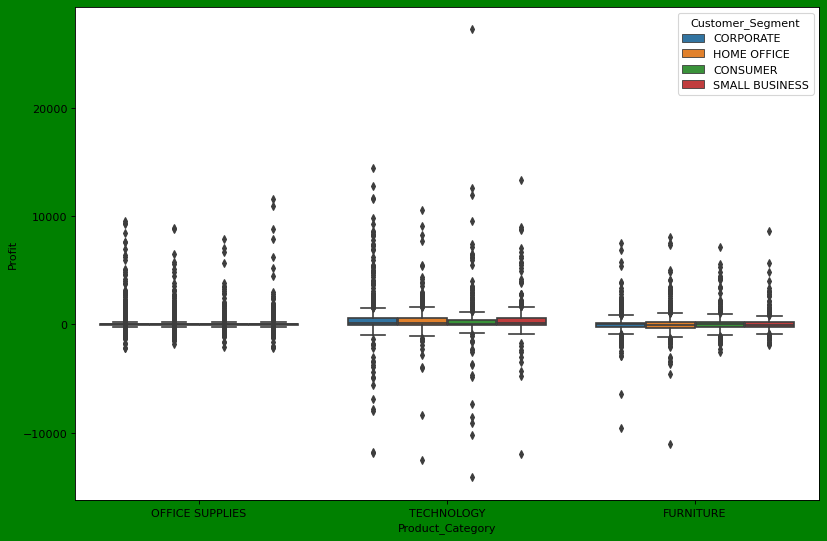

In [24]:
#to set fig size for larger figure
plt.figure(num=None,figsize=(12,8),dpi=80,facecolor='g',edgecolor='k')
sns.boxplot(x='Product_Category',y='Profit',hue='Customer_Segment',data=df3)
plt.show()